# Assignment 1 - Regularization

### Regularization  
Using the accompanying Hitters dataset,  we will explore regression models to predict a player’s Salary from other variables. You must use python.https://gist.github.com/keeganhines/59974f1ebef97bbaa44fb19143f90bad

In [80]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
plt.style.use('seaborn-white')

In [81]:
df = pd.read_csv("./desktop/Hitters.csv")

In [82]:
df.head(5)

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [83]:
# Data Cleaning
# Drop categorical
df1 = df.drop(["Unnamed: 0","League","Division","NewLeague"], axis = 1)
d = df1.dropna()

## 1.1 Lasso

Use LASSO regression to predict Salary from the other numeric predictors. Create a visualization of the coefficient trajectories. Comment on which are the final three predictors that remain in the model.  Use cross-validation to find the optimal value of the regularization penality.  How many predictors are left in that model?

In [101]:
# Lasso Fitting
X = d.iloc[:,:-1]
y = d["Salary"].values

(0.007779270310235391,
 418.86286372660913,
 -445.2391611536667,
 576.8387391024492)

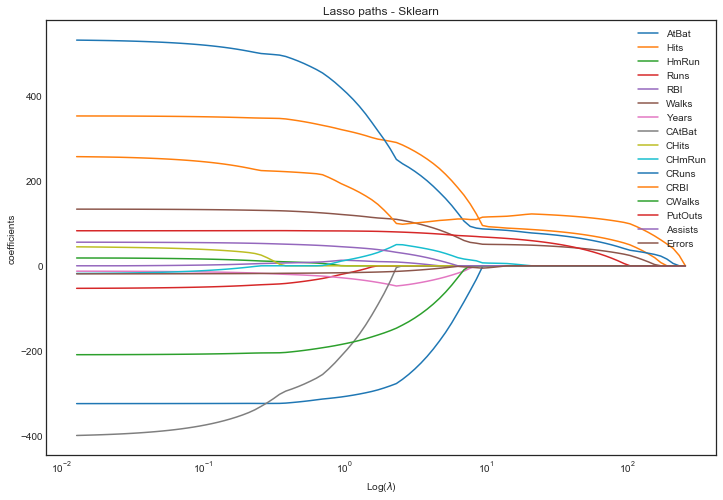

In [118]:
# Lasso Coefficient Trajectory
m,n = X.shape
X_scaled = preprocessing.scale(X)
y_scaled = preprocessing.scale(y)
eps = 5e-5  # the smaller it is the longer is the path

alphas_lasso, coefs_lasso, _ = linear_model.lasso_path(X_scaled, y, eps, fit_intercept=False)

# Display results
plt.figure(figsize = (12,8))
#neg_log_alphas_lasso = -np.log10(alphas_lasso)

for i in range(n):
    plt.plot(alphas_lasso, coefs_lasso[i], label = d.columns[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('coefficients')
plt.title('Lasso paths - Sklearn')
plt.legend()
plt.axis('tight')

The final three predictors that remain in the models are *CRBI*, *Hits*, and *CRuns*.

# Lasso Cross Validation

In [171]:
# train classifier - CV
lassoCV = linear_model.LassoCV(cv = 10, max_iter = 1000, normalize = True)
clf_lasso_cv = lassoCV.fit(X, y)

### Optimal Alpha

In [172]:
# Use cross-validation to find the optimal value of the regularization penality.
print("The optimal penalization is alpha = ", clf_lasso_cv.alpha_)

The optimal penalization is alpha =  0.0635481759985745


In [173]:
# 14 predictors are left in the model
print(np.count_nonzero(clf_lasso_cv.coef_),"predictors are left in the model, and HmRun and CHits are excluded from the regressors.")

14 predictors are left in the model, and HmRun and CHits are excluded from the regressors.


# Repeat with Ridge Regression. 
Visualize coeffecient trajectories. Use cross-validation to find the optimal vaule of the regularization penalty.

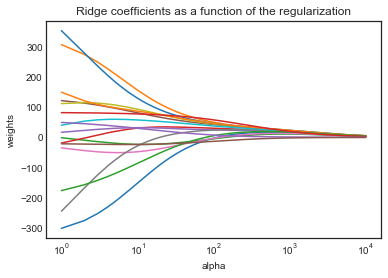

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# Compute paths
X = d.iloc[:,:-1]
y = d["Salary"].values
X_scaled = preprocessing.scale(X)
y_scaled = preprocessing.scale(y)
m,n = X.shape
n_alphas = 200
alphas = np.arange(1,10000,1)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    rr = ridge.fit(X_scaled, y)
    coefs.append(rr.coef_)

# Display results

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [147]:
# Ridge Cross Validation
alphas = 10**np.linspace(10,-10,100)*0.5
clf_rr_cv = linear_model.RidgeCV(alphas=alphas,).fit(X_scaled, y)

In [148]:
print("The best penalization term =",clf_rr_cv.alpha_)

The best penalization term = 2.5470690074081928


# 2. Short Answer.  
Explain in your own words the bias-variance tradeoff.  Whatrole does regularization play in this tradeoff?  Make reference to your findingsin number (1) to describe models of high/low bias and variance.

When fitting models, models with low bias will have high variance, and vice versa. For example, when using large number of predictors for predictive models, the fitted model will have low bias and and higher variance. 

With reference to problem number (1), with different higher penalization to the coefficients (more coefficients are set to zero), the fitted models will have lower variance but higher bias. Therefore, we used cross validation to find the best penalization term for the model to acheive the best evaluation metrics. 

